In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np 
import matplotlib.pyplot as plt

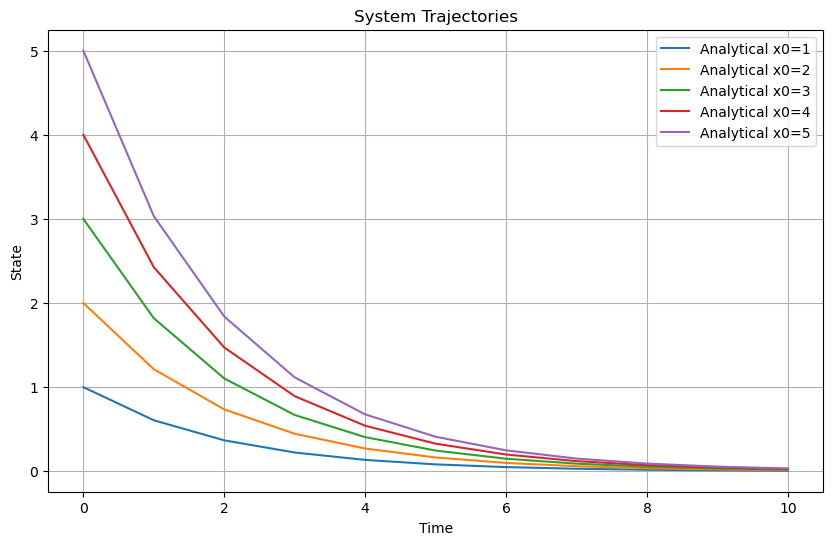

In [ ]:
# Data
t_vals = np.arange(0, 11) 
x0_vals = [1, 2, 3, 4, 5]

# Initialize matrix to store trajectories
Y = np.zeros((len(t_vals), len(x0_vals)))  # (11, 5)
X = t_vals.reshape(-1, 1)  # (11, 1)

# Generate trajectories
for i, x0 in enumerate(x0_vals):
    for j, t in enumerate(t_vals):
        Y[j, i] = x0 * np.exp(-0.5 * t)  # Direct calculation for each time point

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(t_vals, Y[:, i])
plt.xlabel('Time')
plt.ylabel('State')
plt.title('System Trajectories')
plt.grid(True)
plt.legend()
plt.show()

In [44]:
inputs = Input(shape=(1,))
x_dense = Dense(64, activation='sigmoid')(inputs)
x_dense = Dense(64, activation='sigmoid')(x_dense)
outputs = Dense(5)(x_dense)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=500, validation_split=0.2)
y_pred = model.predict(X_test)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - loss: 1.8626 - val_loss: 0.9679
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.7354 - val_loss: 0.8673
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.6161 - val_loss: 0.7744
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.5046 - val_loss: 0.6891
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4010 - val_loss: 0.6113
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.3050 - val_loss: 0.5406
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.2164 - val_loss: 0.4766
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1348 - val_loss: 0.4189
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0600 - val_loss: 0.3671
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.9915 - val_loss: 0.3209
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.9290 - val_loss: 0.2800
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8722 - val_l

C:\Users\ntk00\AppData\Local\Temp\ipykernel_8780\1604821600.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


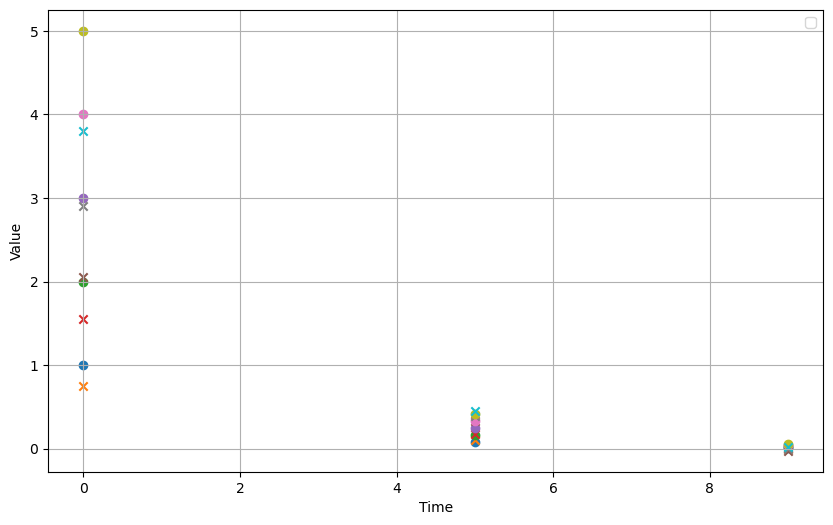

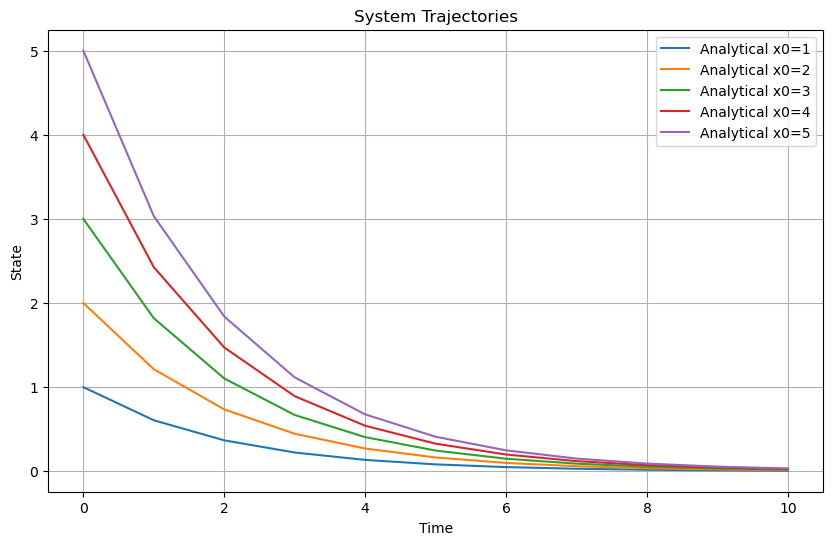

In [47]:
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.scatter(X_test, y_test[:, i])
    plt.scatter(X_test, y_pred[:, i], marker='x')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(t_vals, Y[:, i], label=f'Analytical x0={x0_vals[i]}')
plt.xlabel('Time')
plt.ylabel('State')
plt.title('System Trajectories')
plt.grid()
plt.legend()
plt.show()